### Introduction
Name: Andrian Tanjung
Batch: HCK 004

##### Background Story
Many of us are more concern about our physical state rather than our mental health. Mental health is important factor that affects how we think, feel, and act. It also helps determine how we handle stress and make healthy choices. How do you know when you have a good mental health? It's when you feel positive about yourself and able to cope well with everyday pressures. If you experience issues dealing with everyday problems and pressures, it could affect your mental health problem.

##### Dataset Overview
The dataset is about individuals and their mental health, with information such as their demographic, depression, anxiety and stress scale and whether individuals are diagnosed with depression or anxiety by medical professional.

##### Problem Statement
Develop classification models that can accurately distinguish the target prediction with the highest possible score. The score should align with your analytical perspective as you examine this dataset.

### Import Libraries

In [3]:
## basic
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from imblearn.over_sampling import SMOTENC

## cross validation
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

## feature selection
from phik import phik_matrix
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

## model
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

## tunning
from sklearn.model_selection import GridSearchCV

## pipeline
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline 

## evaluasi
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

## warning
import warnings 
warnings.filterwarnings(action='ignore')

## save
import joblib

### Data Loading and Overview

In [6]:
df = pd.read_csv('h8dsft_P1M2_Andrian_Tanjung.csv')
df.head()

,id,school_year,age,gender,bmi,who_bmi,phq_score,depression_severity,depressiveness,suicidal,depression_diagnosis,depression_treatment,gad_score,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,epworth_score,sleepiness
0,1,1,19,male,33.333333,Class I Obesity,9,Mild,False,False,False,False,11,Moderate,True,False,False,7.0,False
1,2,1,18,male,19.841270,Normal,8,Mild,False,False,False,False,5,Mild,False,False,False,14.0,True
2,3,1,19,male,25.102391,Overweight,8,Mild,False,False,False,False,6,Mild,False,False,False,6.0,False
3,4,1,18,female,23.738662,Normal,19,Moderately severe,True,True,False,False,15,Severe,True,False,False,11.0,True
4,5,1,18,male,25.617284,Overweight,6,Mild,False,False,False,False,14,Moderate,True,False,False,3.0,False


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    783 non-null    int64  
 1   school_year           783 non-null    int64  
 2   age                   783 non-null    int64  
 3   gender                783 non-null    object 
 4   bmi                   783 non-null    float64
 5   who_bmi               783 non-null    object 
 6   phq_score             783 non-null    int64  
 7   depression_severity   779 non-null    object 
 8   depressiveness        780 non-null    object 
 9   suicidal              782 non-null    object 
 10  depression_diagnosis  782 non-null    object 
 11  depression_treatment  779 non-null    object 
 12  gad_score             783 non-null    int64  
 13  anxiety_severity      783 non-null    object 
 14  anxiousness           777 non-null    object 
 15  anxiety_diagnosis     7

Dataset contains of 783 entries and 19 columns in total, in which contains 2 floats, 5 integers and 12 objects type of dataset. 

In [8]:
df.isnull().sum()
## check missing value

id                      0
school_year             0
age                     0
gender                  0
bmi                     0
who_bmi                 0
phq_score               0
depression_severity     4
depressiveness          3
suicidal                1
depression_diagnosis    1
depression_treatment    4
gad_score               0
anxiety_severity        0
anxiousness             6
anxiety_diagnosis       4
anxiety_treatment       2
epworth_score           8
sleepiness              8
dtype: int64

In [9]:
df[df.isnull().any(axis=1)]
## see the missing value rows

,id,school_year,age,gender,bmi,who_bmi,phq_score,depression_severity,depressiveness,suicidal,depression_diagnosis,depression_treatment,gad_score,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,epworth_score,sleepiness
22,23,1,19,male,26.880935,Overweight,14,Moderate,True,True,False,False,0,0,NaN,False,False,8.0,False
23,24,1,19,female,24.386526,Normal,4,None-minimal,False,False,False,False,0,0,NaN,False,False,4.0,False
24,25,1,18,male,22.758307,Normal,0,NaN,NaN,False,False,False,6,Mild,False,False,False,11.0,True
29,30,1,18,female,21.604938,Normal,2,None-minimal,False,False,False,False,0,None-minimal,False,False,False,NaN,NaN
39,40,1,18,male,20.571429,Normal,0,NaN,True,True,False,False,7,Mild,False,False,False,0.0,False
166,167,1,18,male,28.089888,Overweight,2,None-minimal,False,False,False,False,1,None-minimal,False,False,False,NaN,NaN
168,169,1,18,female,19.948060,Normal,4,None-minimal,False,False,False,False,5,Mild,False,False,False,NaN,NaN
222,223,1,19,female,22.206331,Normal,8,Mild,False,False,False,False,8,Mild,False,False,False,NaN,NaN
290,291,2,21,female,33.057851,Class I Obesity,12,Moderate,True,False,False,False,8,Mild,False,NaN,False,6.0,False
297,298,2,20,male,23.148148,Normal,7,Mild,True,True,False,NaN,5,Mild,False,False,False,8.0,False


There are 18 entries with missing value in 10 different columns, where one of them is in the target. Missing value in the target needs to be dropped and others can use other technique. It can be seen that the missing value has no patterns which can be concluded as missing at random (MAR). Instead of taking away the data we will use KNN imputation to help the data stay as original as possible.

In [10]:
df.duplicated().sum()
## check duplicated data

0

There is no duplicated data on the dataset.

In [11]:
df.describe()
## numeric data overview

,id,school_year,age,bmi,phq_score,gad_score,epworth_score
count,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,775.000000
mean,392.000000,2.277139,20.233716,23.420533,7.123883,6.810983,6.376774
std,226.176922,1.163633,1.767217,4.563630,4.426580,4.727352,3.996443
min,1.000000,1.000000,18.000000,0.000000,0.000000,0.000000,0.000000
25%,196.500000,1.000000,19.000000,20.989420,4.000000,3.000000,3.500000
50%,392.000000,2.000000,20.000000,23.140496,6.000000,6.000000,6.000000
75%,587.500000,3.000000,21.000000,25.519924,9.000000,9.000000,9.000000
max,783.000000,4.000000,31.000000,54.552668,24.000000,21.000000,32.000000


Scool year even though it's numeric but in fact it is a category column. From the above, we can see that the dataset has a well-distributed pattern, as evidenced by the mean and median numbers being in close proximity. 

In [12]:
df.describe(include='object')
## string dataset overview

,gender,who_bmi,depression_severity,depressiveness,suicidal,depression_diagnosis,depression_treatment,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,sleepiness
count,783,783,779,780,782,782,779,783,777,779,781,775
unique,2,7,6,2,2,2,2,5,2,2,2,2
top,female,Normal,Mild,False,False,False,False,Mild,False,False,False,False
freq,403,510,344,569,713,716,722,303,587,718,721,634


Beside binary unique value, there are only 3 columns which have interpreted value, let see what are those.

In [13]:
for i in ['who_bmi','depression_severity','anxiety_severity']:
    print(i)
    print(df[i].value_counts())
    print('-' * 10)
## seeing values from above column

who_bmi
Normal               510
Overweight           193
Underweight           35
Class I Obesity       28
Not Availble           8
Class II Obesity       5
Class III Obesity      4
Name: who_bmi, dtype: int64
----------
depression_severity
Mild                 344
None-minimal         226
Moderate             140
Moderately severe     42
none                  15
Severe                12
Name: depression_severity, dtype: int64
----------
anxiety_severity
Mild            303
None-minimal    284
Moderate        124
Severe           66
0                 6
Name: anxiety_severity, dtype: int64
----------


Things needed to do in data cleaning:
1. handling cardinality
2. delete column id
3. change school_year data type
4. drop missing value on the target

### Data General Cleaning

In [14]:
df_ori = df.copy()
## making copy of original dataframe

In [15]:
df.who_bmi.replace({'Not Availble': np.nan},inplace=True)
df['depression_severity'].replace({'none':'None-minimal','Moderate':'Moderately severe'}, inplace=True)
df['anxiety_severity'].replace({'0':'None-minimal'}, inplace=True)
## handling cardinality by replacing some values

In [16]:
df

,id,school_year,age,gender,bmi,who_bmi,phq_score,depression_severity,depressiveness,suicidal,depression_diagnosis,depression_treatment,gad_score,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,epworth_score,sleepiness
0,1,1,19,male,33.333333,Class I Obesity,9,Mild,False,False,False,False,11,Moderate,True,False,False,7.0,False
1,2,1,18,male,19.841270,Normal,8,Mild,False,False,False,False,5,Mild,False,False,False,14.0,True
2,3,1,19,male,25.102391,Overweight,8,Mild,False,False,False,False,6,Mild,False,False,False,6.0,False
3,4,1,18,female,23.738662,Normal,19,Moderately severe,True,True,False,False,15,Severe,True,False,False,11.0,True
4,5,1,18,male,25.617284,Overweight,6,Mild,False,False,False,False,14,Moderate,True,False,False,3.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,779,4,24,female,21.096191,Normal,6,Mild,False,False,False,False,1,None-minimal,False,False,False,3.0,False
779,780,4,22,male,25.308642,Overweight,4,None-minimal,False,False,False,False,6,Mild,False,False,False,3.0,False
780,781,4,22,male,22.720438,Normal,2,None-minimal,False,False,False,False,5,Mild,False,False,False,4.0,False
781,782,4,22,female,23.033168,Normal,17,Moderately severe,True,False,False,False,19,Severe,True,False,False,15.0,True


In [17]:
df.dropna(subset=['suicidal'], inplace=True)
## drop missing value on target

In [18]:
df.isnull().sum()

id                      0
school_year             0
age                     0
gender                  0
bmi                     0
who_bmi                 8
phq_score               0
depression_severity     3
depressiveness          2
suicidal                0
depression_diagnosis    1
depression_treatment    4
gad_score               0
anxiety_severity        0
anxiousness             6
anxiety_diagnosis       4
anxiety_treatment       2
epworth_score           8
sleepiness              8
dtype: int64

As we can see that the missing value on suicidal column is now gone but missing value on who_bmi added 8 points.

In [19]:
df['school_year'] = df['school_year'].astype('object')
## changing data type to object

In [20]:
df.drop(columns='id',inplace=True)
## dropping ID column

In [21]:
pd.set_option("display.precision", 2)
## setting 2 decimal point

### Exploratory Data for Analysis Purposes

In [22]:
df.head()

,school_year,age,gender,bmi,who_bmi,phq_score,depression_severity,depressiveness,suicidal,depression_diagnosis,depression_treatment,gad_score,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,epworth_score,sleepiness
0,1,19,male,33.33,Class I Obesity,9,Mild,False,False,False,False,11,Moderate,True,False,False,7.0,False
1,1,18,male,19.84,Normal,8,Mild,False,False,False,False,5,Mild,False,False,False,14.0,True
2,1,19,male,25.10,Overweight,8,Mild,False,False,False,False,6,Mild,False,False,False,6.0,False
3,1,18,female,23.74,Normal,19,Moderately severe,True,True,False,False,15,Severe,True,False,False,11.0,True
4,1,18,male,25.62,Overweight,6,Mild,False,False,False,False,14,Moderate,True,False,False,3.0,False


<AxesSubplot:xlabel='suicidal', ylabel='count'>

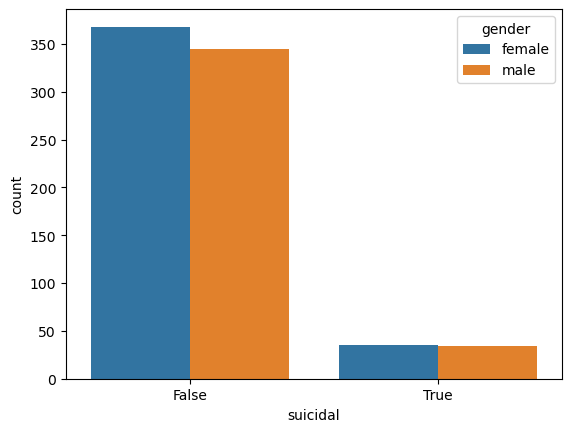

In [23]:
viz = df.groupby('suicidal', as_index=False)['gender'].value_counts()
sns.barplot(data=viz, x='suicidal', y='count', hue='gender')

The number of individuals who reported suicidal tendencies was similar for both men and women, indicating that mental health issues can affect anyone regardless of gender. And also we can conclude that there's imbalance data between suicidal and not.

<AxesSubplot:xlabel='depression_diagnosis', ylabel='count'>

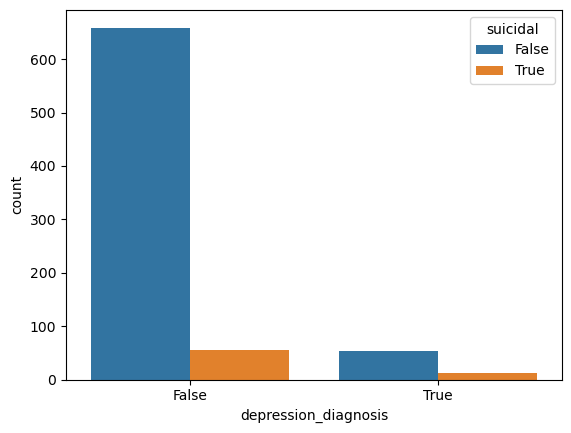

In [24]:
viz = df.groupby(['depression_diagnosis'],as_index=False)[['suicidal']].value_counts()
sns.barplot(data=viz, x='depression_diagnosis', y='count', hue='suicidal')

We see something quite unique here, despite being diagnosed as "false" by professionals, a significant number of individuals still committed suicide. Similarly, a large number of individuals diagnosed with depression did not commit suicide. These findings suggest that a depression diagnosis alone may not be an effective means of identifying individuals who are at risk of suicide or who are struggling with mental health issues.

<AxesSubplot:xlabel='suicidal', ylabel='count'>

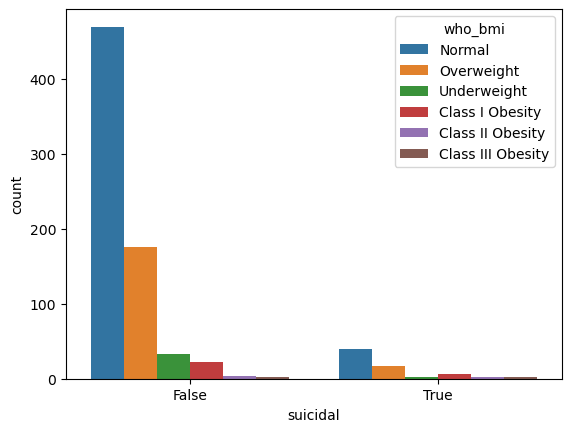

In [25]:
viz = df.groupby('suicidal', as_index=False)['who_bmi'].value_counts()
sns.barplot(data=viz, x='suicidal', y='count', hue='who_bmi')

Based on the data, it appears that individuals with higher body mass index (BMI) are more likely to have committed suicide. 10% of the overweight category, 27% from the Class I Obesity, 3 out of 2 of  Class II Obesity and all Class III Obesity. 

<AxesSubplot:xlabel='school_year', ylabel='count'>

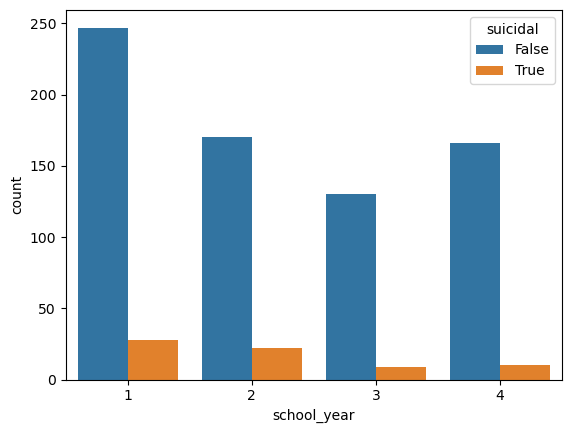

In [26]:
viz = df.groupby('school_year', as_index=False)['suicidal'].value_counts()
sns.barplot(data=viz, x='school_year', y='count', hue='suicidal')

It can be seen that individuals who are in school year 1 and 2 are the most commited suicide. There is 10% individuals who commited suicide on year 1 and 11% on year 2.

<AxesSubplot:xlabel='suicidal', ylabel='count'>

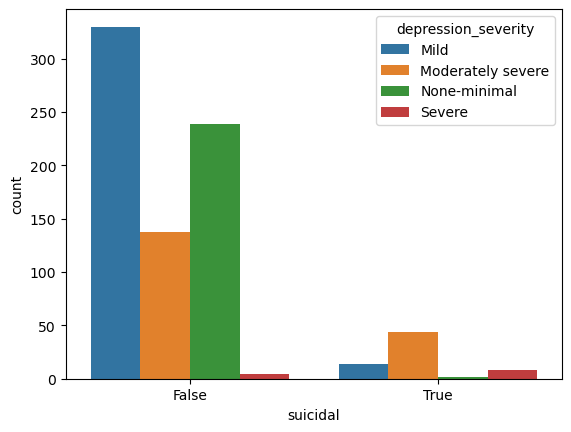

In [27]:
viz = df.groupby('depression_severity', as_index=False)['suicidal'].value_counts()
sns.barplot(data=viz, x='suicidal', y='count', hue='depression_severity')

From the data above we can conclude that most suicidal individuals are the ones who have moderately severe and severe depression. And there are a lot of people who have moderately severe depression too but did not commit suicide.

<AxesSubplot:xlabel='suicidal', ylabel='count'>

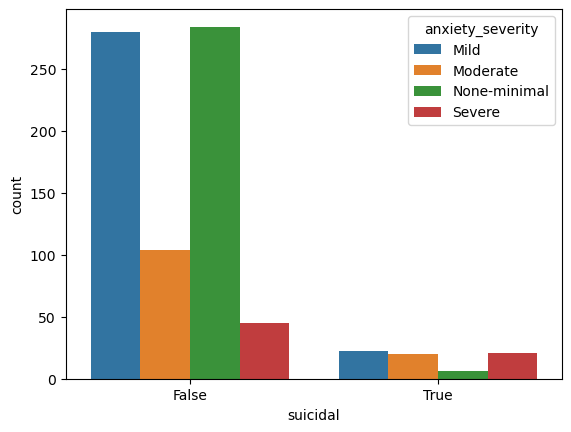

In [28]:
viz = df.groupby('anxiety_severity', as_index=False)['suicidal'].value_counts()
sns.barplot(data=viz, x='suicidal', y='count', hue='anxiety_severity')

It is quite interesting that individuals who have mild anxiety are the one who did the suicide most. 

In [29]:
df.groupby('suicidal', as_index=False)['epworth_score'].mean()


,suicidal,epworth_score
0,False,6.14
1,True,8.91


Can be concluded from the table above, individuals who have epworth_score close to 9 have to be put into watchlist category as the number tendency shows it belongs to class suicidal.

### Feature Engineering Data for Modeling

In [30]:
## split x_train y_train original
X = df.drop('suicidal', axis=1)
y = df['suicidal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.31, stratify=y, random_state=1)

for i in [X_train, X_test, y_train, y_test]:
    print(i.shape)

(539, 17)
(243, 17)
(539,)
(243,)


In [31]:
cat_col = ['school_year','gender','who_bmi','depression_severity','depressiveness','depression_diagnosis','depression_treatment','anxiety_severity','anxiousness','anxiety_diagnosis','anxiety_treatment','sleepiness']
num_col = ['age','bmi','phq_score','gad_score','epworth_score']
## differentiate numeric and category column

In [32]:
X_train_eda = X_train.copy()
## making another x_train variable

--- Feature Engineering on Numeric Column ---

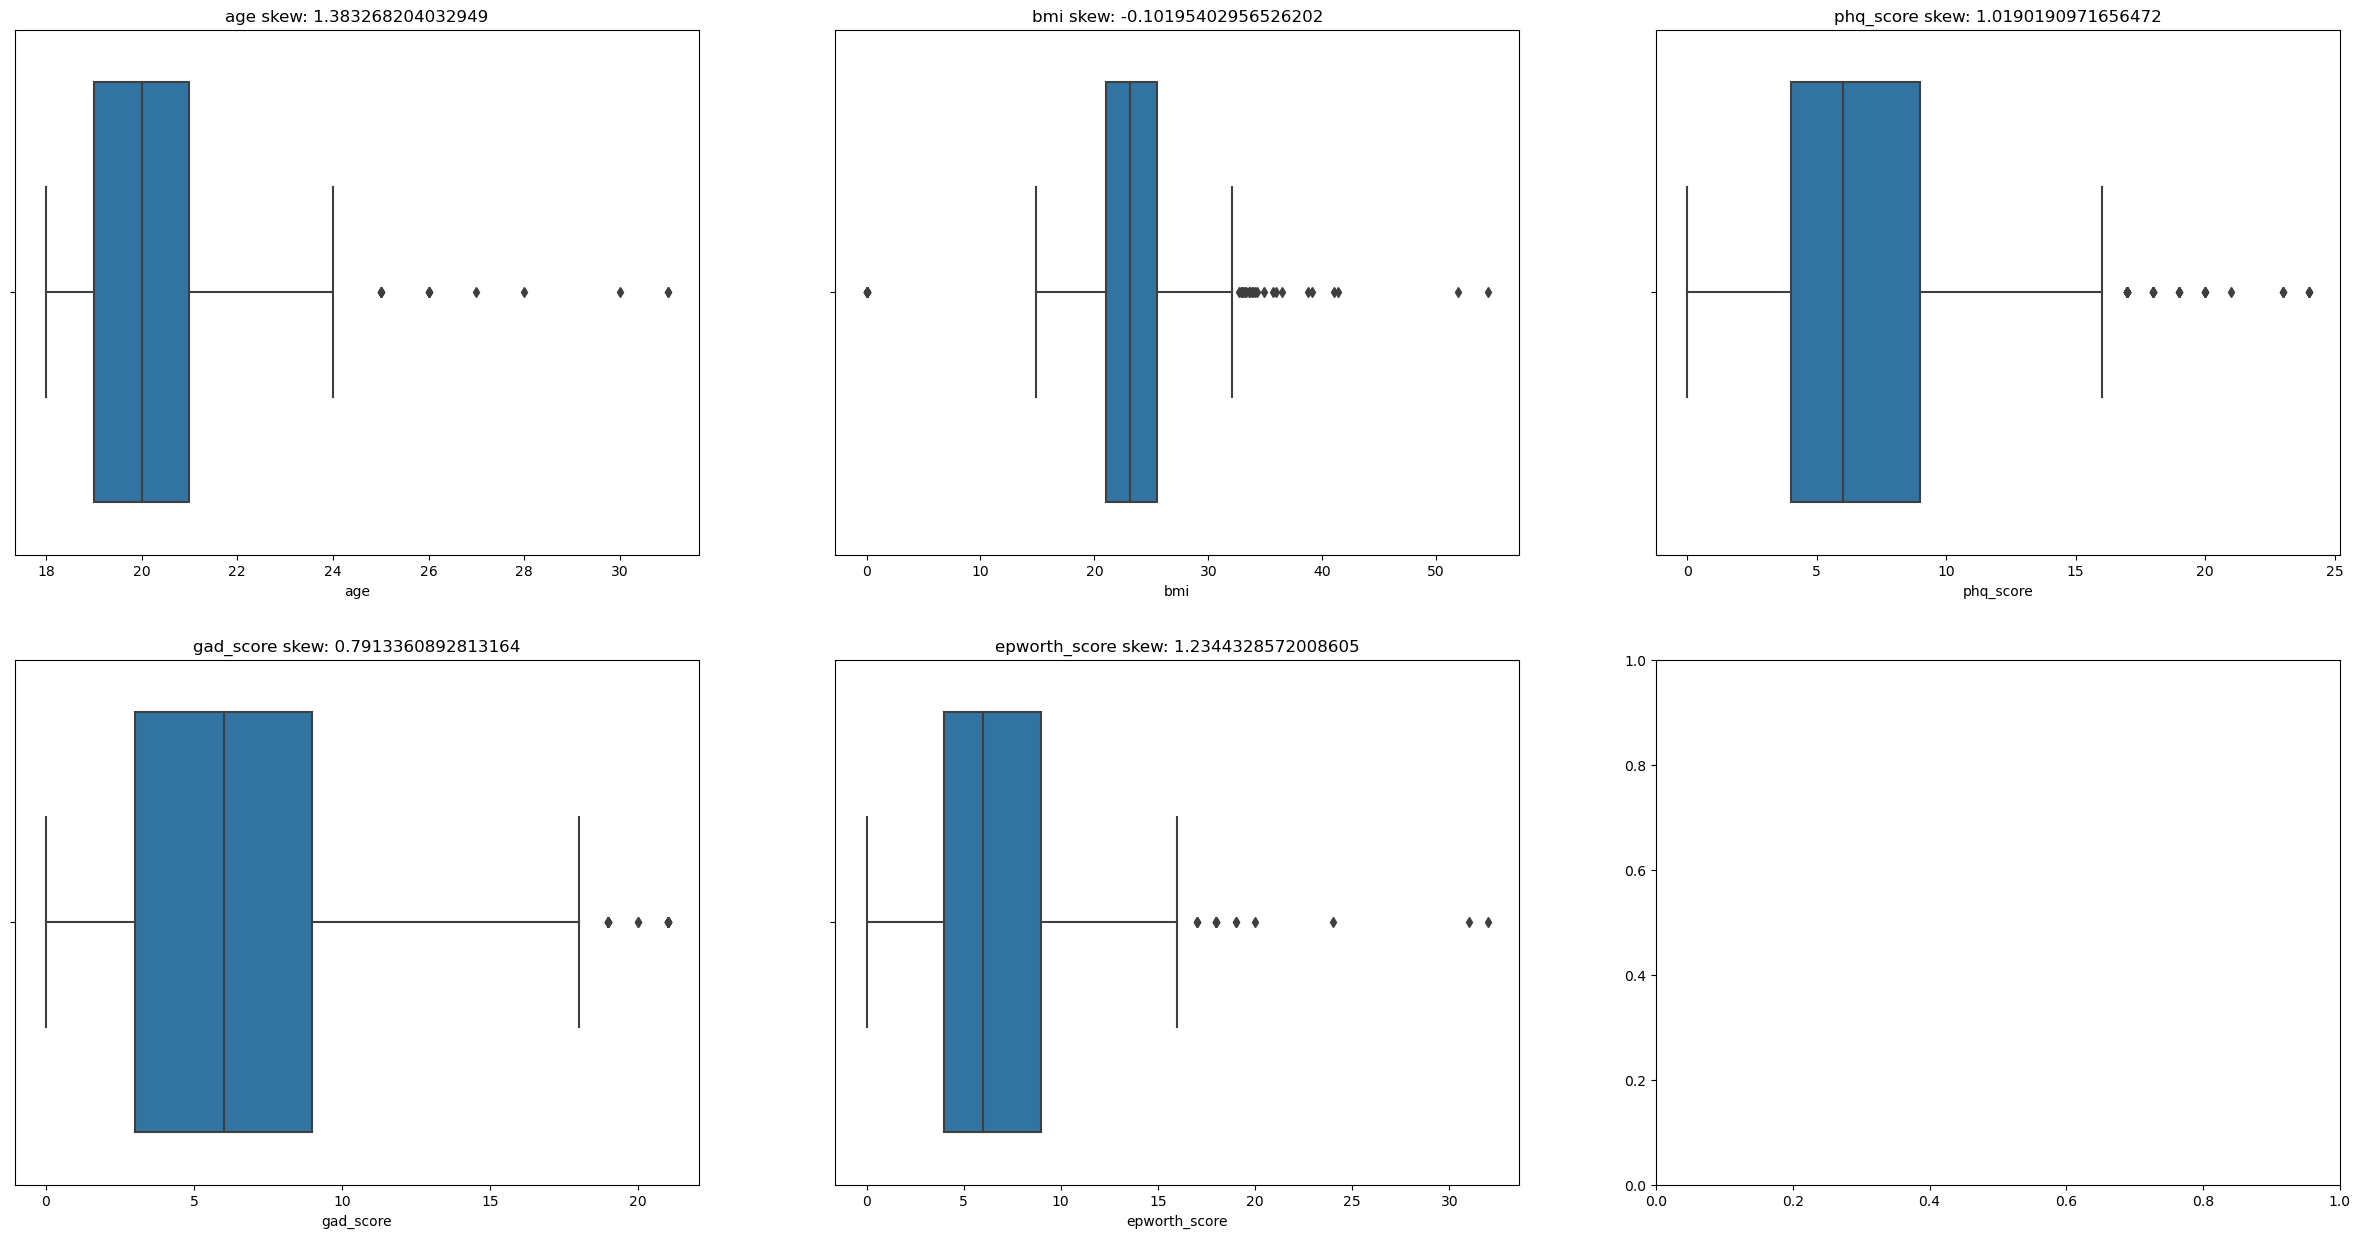

In [33]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=[30,15])
ax = ax.flatten()

for idx, col in enumerate(num_col):
    sns.boxplot(df[col], ax=ax[idx])
    ax[idx].set_title(f'{num_col[idx]} skew: {df[col].skew()}')

As we can see from the numeric columns, they are all skewed and having outliers on them that needs to be solved before modeling. We can use IQR technique with 3 times fold since the columns distribution mostly skewed and skew scores are over 1

In [34]:
imputer_num = KNNImputer(n_neighbors=5)
X_train_eda[num_col] = imputer_num.fit_transform(X_train_eda[num_col])
## handling missing value with knn imputer

In [35]:
wins = Winsorizer(capping_method='iqr', tail='both', fold=3, variables=num_col, missing_values='ignore')
X_train_eda = wins.fit_transform(X_train_eda)
## winsoriezer x_train

In [36]:
X_train_eda.describe()
## numeric overview

,age,bmi,phq_score,gad_score,epworth_score
count,539.00,539.00,539.00,539.00,539.00
mean,20.19,23.56,7.18,6.86,6.38
std,1.72,3.96,4.44,4.76,3.95
min,18.00,7.88,0.00,0.00,0.00
25%,19.00,21.09,4.00,3.00,3.00
50%,20.00,23.18,7.00,6.00,6.00
75%,21.00,25.49,9.00,9.00,9.00
max,27.00,38.71,24.00,21.00,27.00


In [37]:
X_train_eda.isnull().sum()

school_year             0
age                     0
gender                  0
bmi                     0
who_bmi                 4
phq_score               0
depression_severity     2
depressiveness          1
depression_diagnosis    0
depression_treatment    2
gad_score               0
anxiety_severity        0
anxiousness             3
anxiety_diagnosis       3
anxiety_treatment       2
epworth_score           0
sleepiness              5
dtype: int64

As we can see that mean and median numbers are proximity which mean the outliers have been taken care of as well as the missing value on numeric column

In [38]:
scaler = MinMaxScaler()
X_train_eda[num_col] = scaler.fit_transform(X_train_eda[num_col])
## scalling numeric column

In [39]:
X_train_eda[num_col]

,age,bmi,phq_score,gad_score,epworth_score
590,0.33,0.55,0.21,0.29,0.44
554,0.56,0.58,0.38,0.33,0.11
497,0.22,0.40,0.08,0.19,0.56
741,0.44,0.58,0.17,0.19,0.19
85,0.00,0.50,0.12,0.19,0.07
...,...,...,...,...,...
715,0.44,0.58,0.17,0.29,0.15
712,0.44,0.53,0.08,0.00,0.22
527,0.22,0.44,0.50,0.76,0.07
251,1.00,0.49,0.46,0.67,0.15


All the numeric column has been scaled. So what we have done in numeric columns are; handling missing value with knn imputer, handling outliers with winsorizer iqr technique and scaling. And now we are done with numeric and let's go with the categorical columns.

--- Feature Engineering on Category Column ---

In [40]:
imputer_col = SimpleImputer(strategy='most_frequent')
X_train_eda[cat_col] = imputer_col.fit_transform(X_train_eda[cat_col])
## handling missing value with simple imputer

In [41]:
X_train_eda.isnull().sum()

school_year             0
age                     0
gender                  0
bmi                     0
who_bmi                 0
phq_score               0
depression_severity     0
depressiveness          0
depression_diagnosis    0
depression_treatment    0
gad_score               0
anxiety_severity        0
anxiousness             0
anxiety_diagnosis       0
anxiety_treatment       0
epworth_score           0
sleepiness              0
dtype: int64

Now all the missing value has been handled properly

In [42]:
cat_col.remove('school_year')
## removing school_year from category column for the moment

In [43]:
who_bmi = ['Normal','Underweight','Overweight','Class I Obesity','Class II Obesity','Class III Obesity']
ord_feature1 = ['who_bmi']
ord_who_bmi = OrdinalEncoder(categories=[who_bmi])

depression_severity = ['None-minimal','Mild','Moderately severe','Severe']
ord_feature2 = ['depression_severity']
ord_depression_severity = OrdinalEncoder(categories=[depression_severity])

anxiety_severity = ['None-minimal', 'Mild', 'Moderate','Severe']
ord_feature3 = ['anxiety_severity']
ord_anxiety_severity = OrdinalEncoder(categories=[anxiety_severity])

gender = ['female','male']
ord_feature4 = ['gender']
ord_gender = OrdinalEncoder(categories=[gender])

depressiveness = [False,True]
ord_feature5 = ['depressiveness']
ord_depressiveness = OrdinalEncoder(categories=[depressiveness])

depression_diagnosis = [False, True]
ord_feature6 = ['depression_diagnosis']
ord_depression_diagnosis = OrdinalEncoder(categories=[depression_diagnosis])

depression_treatment = [False, True]
ord_feature7 = ['depression_treatment']
ord_depression_treatment = OrdinalEncoder(categories=[depression_treatment])

anxiousness = [False, True]
ord_feature8 = ['anxiousness']
ord_anxiousness = OrdinalEncoder(categories=[anxiousness])

anxiety_diagnosis = [False, True]
ord_feature9 = ['anxiety_diagnosis']
ord_anxiety_diagnosis = OrdinalEncoder(categories=[anxiety_diagnosis])

anxiety_treatment = [False, True]
ord_feature10 = ['anxiety_treatment']
ord_anxiety_treatment = OrdinalEncoder(categories=[anxiety_treatment])

sleepiness = [False, True]
ord_feature11 = ['sleepiness']
ord_sleepiness = OrdinalEncoder(categories=[sleepiness])

## making list of ordinal value


In [44]:
ord = ColumnTransformer(transformers= [
    ('ord4', ord_gender, ord_feature4),
    ('ord1', ord_who_bmi, ord_feature1),
    ('ord2', ord_depression_severity, ord_feature2),
    ('ord5', ord_depressiveness, ord_feature5),
    ('ord6', ord_depression_diagnosis, ord_feature6),
    ('ord7', ord_depression_treatment, ord_feature7),
    ('ord3', ord_anxiety_severity, ord_feature3),
    ('ord8', ord_anxiousness, ord_feature8),
    ('ord9', ord_anxiety_diagnosis, ord_feature9),
    ('ord10', ord_anxiety_treatment, ord_feature10),
    ('ord11', ord_sleepiness, ord_feature11)
])
## using column transformer for ordinal process

In [45]:
cat_ord = pd.DataFrame(ord.fit_transform(X_train_eda[cat_col])) ## ordinal encode for the category column
cat_ord.columns = cat_col ## getting the column after the encode


In [46]:
cat_ord['school_year'] = X_train['school_year'].reset_index(drop=True)
## combined with the school_year column from X_train original
cat_ord.head()

,gender,who_bmi,depression_severity,depressiveness,depression_diagnosis,depression_treatment,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,sleepiness,school_year
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3
1,1.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,3
3,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1


So far, we have filled the missing values in the categorical columns using a simple imputer and performed ordinal encoding. Additionally, we have re-introduced the 'school_year' column, which we had dropped earlier as it was already in a numeric format. Our next step is to merge the categorical columns with the numerical columns to determine the optimal feature selection for our model.

--- Combining Back Numeric and Category Features ---

In [47]:
X_train_eda = pd.concat([cat_ord,X_train_eda[num_col].reset_index(drop=True)],axis=1)
## combining numeric and category that has been modified

In [48]:
y_train.reset_index(drop=True)
## reset y_trian index

0      False
1      False
2      False
3      False
4      False
       ...  
534    False
535    False
536    False
537    False
538    False
Name: suicidal, Length: 539, dtype: object

In [49]:
le = LabelEncoder()
y_train = pd.DataFrame(le.fit_transform(y_train)) ## labeling encode y_train
y_test = pd.DataFrame(le.transform(y_test)) ## labeling encode y_test 

In [50]:
X_train_eda['suicidal'] = y_train
## making target column back on the dataframe
X_train_eda

,gender,who_bmi,depression_severity,depressiveness,depression_diagnosis,depression_treatment,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,sleepiness,school_year,age,bmi,phq_score,gad_score,epworth_score,suicidal
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3,0.33,0.55,0.21,0.29,0.44,0
1,1.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3,0.56,0.58,0.38,0.33,0.11,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,3,0.22,0.40,0.08,0.19,0.56,0
3,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0.44,0.58,0.17,0.19,0.19,0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.00,0.50,0.12,0.19,0.07,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4,0.44,0.58,0.17,0.29,0.15,0
535,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0.44,0.53,0.08,0.00,0.22,0
536,1.0,0.0,2.0,1.0,1.0,0.0,3.0,1.0,1.0,0.0,0.0,3,0.22,0.44,0.50,0.76,0.07,0
537,1.0,0.0,2.0,1.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,1,1.00,0.49,0.46,0.67,0.15,0


After completing the feature engineering process, we have combined our numerical, categorical and target features. We are now ready to perform feature selection using various techniques such as phi correlation matrix, mutual information classification, and recursive factor elimination.

--- Feature Selection ---

In [51]:
X_train_eda.phik_matrix().nlargest(15,'suicidal')['suicidal']
## showing phix matrix score

interval columns not set, guessing: ['gender', 'who_bmi', 'depression_severity', 'depressiveness', 'depression_diagnosis', 'depression_treatment', 'anxiety_severity', 'anxiousness', 'anxiety_diagnosis', 'anxiety_treatment', 'sleepiness', 'age', 'bmi', 'phq_score', 'gad_score', 'epworth_score', 'suicidal']


suicidal                1.00
depressiveness          0.71
phq_score               0.65
depression_severity     0.54
anxiety_severity        0.44
gad_score               0.42
anxiousness             0.38
epworth_score           0.35
depression_diagnosis    0.28
depression_treatment    0.27
anxiety_diagnosis       0.24
who_bmi                 0.21
sleepiness              0.21
anxiety_treatment       0.20
bmi                     0.16
Name: suicidal, dtype: float64

In [52]:
mutual_info =  mutual_info_classif(X_train_eda,y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train_eda.columns
mutual_info.sort_values(ascending=False)
## showing mutual info score

suicidal                3.01e-01
depressiveness          1.29e-01
phq_score               8.76e-02
depression_severity     4.83e-02
gad_score               4.44e-02
anxiety_severity        3.47e-02
bmi                     2.48e-02
sleepiness              2.01e-02
anxiousness             1.75e-02
depression_diagnosis    1.74e-02
epworth_score           1.48e-02
school_year             1.45e-02
anxiety_treatment       1.10e-02
depression_treatment    1.07e-02
anxiety_diagnosis       5.98e-04
age                     0.00e+00
who_bmi                 0.00e+00
gender                  0.00e+00
dtype: float64

In [53]:
lr = LogisticRegression(max_iter=300) 
rfe = RFE(estimator=lr, n_features_to_select=8, step=1) ## using logistic regression as estimator
rfe.fit(X_train_eda, y_train)
rfe.transform(X_train_eda)
result = pd.DataFrame(rfe.transform(X_train_eda), columns=rfe.get_feature_names_out()) ## making the result in dataframe and call out the column names
result.head()

,gender,depressiveness,depression_diagnosis,anxiety_severity,anxiety_diagnosis,sleepiness,phq_score,suicidal
0,0.0,0.0,0.0,1.0,0.0,1.0,0.21,0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.38,0
2,0.0,0.0,0.0,0.0,1.0,1.0,0.08,0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.17,0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.12,0


Respectively phq_score is having multicollinearity with all the deppresion matter since it measures the deppresion score, same with gad_score which measures anxiety matter, whether epworth_score measures the sleepiness level.
Based on the result above we can conclude that the importants features that affect the target are:
1. depressiveness (categorical)
2. phq_score (numerical)
3. gad_score (numerical)
4. epworth_score (numerical)
5. who_bmi (categorical)


In [54]:
X = X_train_eda[['depressiveness', 'phq_score', 'gad_score','who_bmi', 'epworth_score']] 
vif_data = pd.DataFrame() 
vif_data['feature'] = X.columns 
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]  
(vif_data.sort_values(by='VIF', ascending=False))


,feature,VIF
1,phq_score,9.05
2,gad_score,5.57
4,epworth_score,3.66
0,depressiveness,2.79
3,who_bmi,1.37


As we expect that phq_score would have a bit higher vif here since it has multicollinearity with depressiveness. But since it's still under the limit we are still going to use it cause it's one of the most important factors.

In [55]:
X_train_featsel = X_train[['phq_score','gad_score','epworth_score','depressiveness','who_bmi']].reset_index(drop=True)
## creating X_train with feature selection columns
X_test_featsel = X_test[['phq_score','gad_score','epworth_score','depressiveness','who_bmi']].reset_index(drop=True)
## creating X_test with feature selection columns

In [56]:
X_train_featsel.head()

,phq_score,gad_score,epworth_score,depressiveness,who_bmi
0,5,6,12.0,False,Normal
1,9,7,3.0,False,Overweight
2,2,4,15.0,False,Normal
3,4,4,5.0,False,Overweight
4,3,4,2.0,False,Normal


In [57]:
X_test_featsel.head()

,phq_score,gad_score,epworth_score,depressiveness,who_bmi
0,5,3,6.0,False,Normal
1,5,7,8.0,False,Normal
2,5,4,1.0,False,Overweight
3,7,12,9.0,False,Normal
4,2,4,6.0,False,Normal


We change the X_train and X_test columns into the features we have choosen earlier, and it will show like above. Need to remember that the new variables are still containing raw that contains missing value, outlier and etc.

### Preprocess

For easier deployment, we will be using pipelines during preprocessing, applying the same engineering techniques to both the numeric and categorical data. However, the target data is highly imbalanced, which can lead to the model performing better on the training dataset. To address this issue, we will utilize the SMOTENC technique to oversample the target data and achieve a more balanced dataset, with a target class representation of at least 50%.

In [58]:
num_pipeline = Pipeline([
    ('mv',KNNImputer(n_neighbors=5)),
    ('outlier',Winsorizer(capping_method='iqr', fold=3, tail='both')),
    ('scaling', MinMaxScaler())
])
## creating numeric pipeline and fit transform it to X_train

In [59]:
cat_pipeline = Pipeline([
    ('mv',SimpleImputer(strategy='most_frequent')),
    ('ord1', OrdinalEncoder(categories=[who_bmi,depressiveness]))
])
## creating category pipeline and fit transform it to X_train

In [60]:
pipeline = ColumnTransformer([
    ('num', num_pipeline, ['phq_score','gad_score','epworth_score']),
    ('cat', cat_pipeline, ['who_bmi','depressiveness'])
])
## combining numeric and category pipeline into a pipeline that is ready to use

In [61]:
X_train_featsel = pd.DataFrame(pipeline.fit_transform(X_train_featsel))
## fit transform into X_train dataset

In [62]:
X_test_featsel = pd.DataFrame(pipeline.transform(X_test_featsel))
## transform into X_test dataset

In [63]:
smotenc = SMOTENC(random_state=1, categorical_features=[3,4], sampling_strategy=0.69)
X_resample, y_resampled = smotenc.fit_resample(X_train_featsel,y_train)

Now we get X_train and y_train which are changed into X_resample and y_resample. In these variables it has been modified by the machine to have the minority sample to be balanced by 69% from the majority sample. So we will use the X and y resample variables from now on.

### Modeling

As there are multiple classification models available, we will compare the most commonly used ones and select the best performer for our tuning process. Our objective is to create a model that accurately categorizes individuals as either likely to commit suicide or not, while also minimizing the number of false positive (+ is suicidal). Given the importance of accurately identifying those at risk of suicide, we will prioritize the model's precision score over other performance metrics, as this will help us reduce the number of missed cases.

In [64]:
log_model = LogisticRegression(random_state=1) #Defining Logistic Regression Model
svm_model = SVC(random_state=1) #Defining SVM Classifier Model
dt_model = DecisionTreeClassifier(random_state=1) #Defining Decision Tree Classifier Model
rf_model = RandomForestClassifier(random_state=1) #Defining Random Forest Classifier Model
knn_model = KNeighborsClassifier() #Defining KNN Classifier Model
nb_model = GaussianNB() #Defining naive bayes Model
ada_model = AdaBoostClassifier(random_state=1) #Defining AdaBoost Classifier Model
skfold=StratifiedKFold(n_splits=7)

In [65]:
models = [log_model, svm_model, dt_model, rf_model, knn_model, nb_model, ada_model]
model_names = ['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest', 'KNN', 'Naive Bayes', 'AdaBoost']
train_scores = []
test_scores = []

for i, model in enumerate(models):
    print(f"Training and test score from model {model_names[i]}")
    
    # Fit the model on the training data
    model.fit(X_resample, y_resampled)
    
    # Make predictions on the training and test data
    train_preds = model.predict(X_resample)
    test_preds = model.predict(X_test_featsel)
    
    # Calculate the accuracy score on the training and test data
    train_score = precision_score(y_resampled, train_preds)
    test_score = precision_score(y_test, test_preds)
    
    # Append the scores to the respective lists
    train_scores.append(train_score)
    test_scores.append(test_score)
    
    # Print the results
    print(f"Train precision score: {train_score:.3f}")
    print(f"Test precision score: {test_score:.3f}\n")


Training and test score from model Logistic Regression
Train precision score: 0.773
Test precision score: 0.328

Training and test score from model SVM
Train precision score: 0.776
Test precision score: 0.323

Training and test score from model Decision Tree
Train precision score: 1.000
Test precision score: 0.455

Training and test score from model Random Forest
Train precision score: 1.000
Test precision score: 0.450

Training and test score from model KNN
Train precision score: 0.892
Test precision score: 0.325

Training and test score from model Naive Bayes
Train precision score: 0.773
Test precision score: 0.328

Training and test score from model AdaBoost
Train precision score: 0.953
Test precision score: 0.423



From the results obtained, it is evident that AdaBoost performed the best in terms of precision score. Notably, all models exhibited overfitting as the training scores were significantly higher than the corresponding test scores. Now we have all the models result we still need to double check if their result is valid with cross validation method.

In [66]:
cv_scores = []
cv_std = []

for i, model in enumerate(models):
    print(f"Evaluating {model_names[i]} using cross-validation")
    
    # Perform cross-validation and compute the mean recall score
    precision_scores = cross_val_score(model, X_test_featsel, y_test, cv=skfold, scoring='precision')
    mean_precision_score = precision_scores.mean()
    std_precision_score = precision_scores.std()

    # Append the mean recall score to the cv_scores list
    cv_scores.append(mean_precision_score)
    cv_std.append(std_precision_score)

    # Print the results
    print(f"Mean precision score: {mean_precision_score:.3f} +/- {std_precision_score:.3f}\n")

Evaluating Logistic Regression using cross-validation
Mean precision score: 0.000 +/- 0.000

Evaluating SVM using cross-validation
Mean precision score: 0.000 +/- 0.000

Evaluating Decision Tree using cross-validation
Mean precision score: 0.607 +/- 0.277

Evaluating Random Forest using cross-validation
Mean precision score: 0.619 +/- 0.452

Evaluating KNN using cross-validation
Mean precision score: 0.048 +/- 0.117

Evaluating Naive Bayes using cross-validation
Mean precision score: 0.363 +/- 0.119

Evaluating AdaBoost using cross-validation
Mean precision score: 0.524 +/- 0.382



Based on the cross-validation score, it appears that random forest model is the top performer. While AdaBoost previously had the highest score, the cross-validation technique is more reliable as it has been tested 7 times using stratified k-fold technique. Therefore, we will be focusing on optimizing the hyperparameters for the random forest model.

--- Random Forest Model ---

In [78]:
model_train = rf_model.predict(X_resample)
model_test = rf_model.predict(X_test_featsel)

print('train')
print(classification_report(y_resampled, model_train))
print("Precision score result", precision_score(y_resampled,model_train))

print('test')
print(classification_report(y_test, model_test))
print("Precision score result", precision_score(y_test,model_test))

train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       491
           1       1.00      1.00      1.00       338

    accuracy                           1.00       829
   macro avg       1.00      1.00      1.00       829
weighted avg       1.00      1.00      1.00       829

Precision score result 1.0
test
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       222
           1       0.45      0.43      0.44        21

    accuracy                           0.91       243
   macro avg       0.70      0.69      0.69       243
weighted avg       0.90      0.91      0.90       243

Precision score result 0.45


precision score
0.45


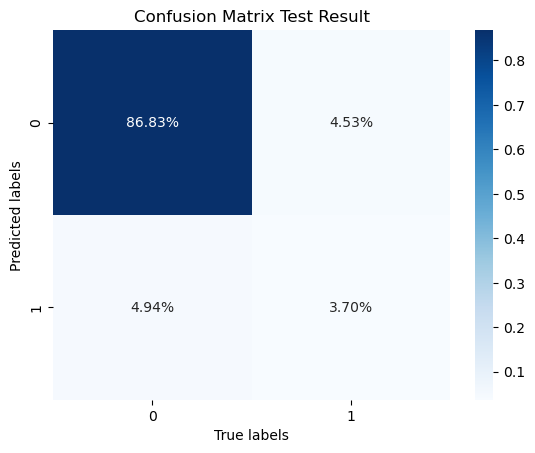

In [68]:
model_test = rf_model.predict(X_test_featsel) ## model random forest

cf_matrix=confusion_matrix(y_test,model_test) ## confusion matrix
ax= plt.subplot()
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt='.2%', cmap='Blues', ax=ax);  
ax.set_ylabel('Predicted labels')
ax.set_xlabel('True labels') 
ax.set_title('Confusion Matrix Test Result')
print('precision score')
print(precision_score(y_test, model_test))

Based on the classification report, it appears that the model is overfit, with a perfect score on the training set but low precision score. The confusion matrix indicates that the model has high accuracy in classifying individuals in class 0, but it still misclassifies a significant number of individuals in class 1 (suicidal) as class 0. Moving forward, we will explore if there are opportunities to improve the model performance through hyperparameter tuning.

### Parameter Tunning

In [69]:
param = [
    {'n_estimators' : [100,300,500],
     'max_depth' : [3,5,7,9],
     'min_samples_split' : [1,2,3,4],
     'min_samples_leaf' : [2,4,6,8]
     }
] ## modify hyperparameter

rf = RandomForestClassifier(random_state=1)
grid_search =  GridSearchCV(rf, param, cv=5,scoring='precision',return_train_score=True)
grid_search.fit(X_resample,y_resampled) 

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid=[{'max_depth': [3, 5, 7, 9],
                          'min_samples_leaf': [2, 4, 6, 8],
                          'min_samples_split': [1, 2, 3, 4],
                          'n_estimators': [100, 300, 500]}],
             return_train_score=True, scoring='precision')

In [70]:
grid_search.best_params_
## showing the best estimator

{'max_depth': 9,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [71]:
model = grid_search.best_estimator_ ## using best estimator as model
model.fit(X_resample,y_resampled)
          
model_train = model.predict(X_resample)
model_test = model.predict(X_test_featsel)

print('train')
print(classification_report(y_resampled, model_train))
print("Precision score result", precision_score(y_resampled,model_train))

print('test')
print(classification_report(y_test, model_test))
print("Precision score result", precision_score(y_test,model_test))

train
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       491
           1       0.98      1.00      0.99       338

    accuracy                           0.99       829
   macro avg       0.99      0.99      0.99       829
weighted avg       0.99      0.99      0.99       829

Precision score result 0.9825072886297376
test
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       222
           1       0.42      0.48      0.44        21

    accuracy                           0.90       243
   macro avg       0.68      0.71      0.69       243
weighted avg       0.90      0.90      0.90       243

Precision score result 0.4166666666666667


precision score
0.4166666666666667


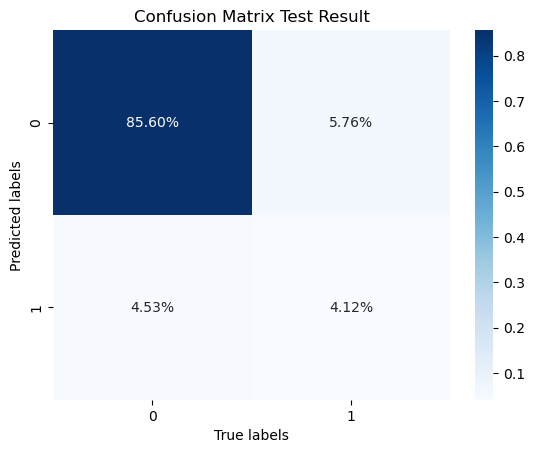

In [72]:
cf_matrix=confusion_matrix(y_test,model_test) ## confusion matrix after tunning
ax= plt.subplot()
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt='.2%', cmap='Blues', ax=ax);  
ax.set_ylabel('Predicted labels')
ax.set_xlabel('True labels') 
ax.set_title('Confusion Matrix Test Result')
print('precision score')
print(precision_score(y_test, model_test))

Unfortunately, hyperparameter tuning did not result in any improvement in the model performance. Comparing the results before and after tuning, the models in fact has better precision and f1 score beforehand, and both are still overfit. Based on the model selection, while the models have good accuracy in classifying individuals in class 0, they are not effective in identifying individuals in class 1, which is our main objective in this dataset. Therefore, we cannot recommend deploying the model in its current state. Future work can explore different features that may provide more predictive power, and also collect more real data on suicidal individuals as the SMOTENC technique may not be sufficient to address the class imbalance issue. Additionally, alternative models can also be explored to improve the classification performance.

Now we want to try to examine what made the models categorize class 1 as a class 0

In [73]:
X_test.reset_index(drop=True, inplace=True) ## reset index before create a new column
X_test['result'] = model_test ## creating a new column based on the result
X_test.head()

,school_year,age,gender,bmi,who_bmi,phq_score,depression_severity,depressiveness,depression_diagnosis,depression_treatment,gad_score,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,epworth_score,sleepiness,result
0,2,20,male,23.37,Normal,5,Mild,False,False,False,3,None-minimal,False,False,False,6.0,False,0
1,3,21,male,23.94,Normal,5,Mild,False,False,False,7,Mild,False,False,False,8.0,False,0
2,1,19,male,26.45,Overweight,5,Mild,False,False,False,4,None-minimal,False,False,False,1.0,False,0
3,1,18,female,22.10,Normal,7,Mild,False,False,False,12,Moderate,True,False,False,9.0,False,0
4,4,22,male,24.22,Normal,2,None-minimal,False,False,False,4,None-minimal,False,False,False,6.0,False,0


In [74]:
X_test[(X_test['result']==1)][['depressiveness', 'phq_score', 'gad_score','who_bmi', 'epworth_score']].sample(20, random_state=1)

,depressiveness,phq_score,gad_score,who_bmi,epworth_score
172,True,10,14,Overweight,7.0
209,True,19,11,Normal,1.0
25,True,8,5,Normal,5.0
175,True,24,21,Normal,19.0
213,True,15,16,Underweight,16.0
206,True,15,14,Normal,10.0
119,True,10,7,Overweight,5.0
37,True,20,15,Normal,1.0
20,True,10,10,Normal,14.0
211,True,15,10,Overweight,8.0


In [75]:
X_test[(X_test['result']==0)][['depressiveness', 'phq_score', 'gad_score','who_bmi', 'epworth_score']].sample(20, random_state=1)

,depressiveness,phq_score,gad_score,who_bmi,epworth_score
180,False,9,7,Normal,9.0
39,False,6,3,Overweight,4.0
40,False,5,9,Normal,4.0
224,False,1,0,Overweight,4.0
174,True,10,17,Normal,7.0
108,True,14,9,Normal,5.0
70,False,5,18,Overweight,8.0
43,False,6,5,Normal,3.0
123,False,0,1,Overweight,0.0
4,False,2,4,Normal,6.0


Based on my assumption, it seems like model categorize individuals who should have been in class 0 but in fact they are on class 1 is because of they have 'depressiveness', high score in 'phq_score' and 'gad_score'.

### Model Saving

In [76]:
X_train_featsel1 = X_train[['phq_score','gad_score','epworth_score','depressiveness','who_bmi']].reset_index(drop=True)
## creating X_train with feature selection columns

In [77]:
all_process = Pipeline([
    ('preprocess',pipeline),
    ('model', model)
])
## all pipeline process

all_process.fit(X_train_featsel1,y_train)
## fit into variable

with open('model_pipeline_ML2.pkl','wb') as file_1:
  joblib.dump(all_process, file_1)
## saving model

### Conclusion
- The data target exhibits an imbalanced distribution, which is addressed by applying the SMOTENC method.
- Based on the phik matrix, mutual info classification, and recursive feature elimination techniques, the selected features for the model are 'depressiveness', 'phq_score', 'gad_score', 'who_bmi', and 'epworth_score'. Those variables has been checked that has no high multicollinearity among them.
- Scoring model is based on precision score where in a point of view we want to minimalize the error made by the model which predict individuals who are tend to commit suicide but predicted as they are not.
- The best model with one time implementation to train and test is AdaBoost. Meanwhile with cross validation result, the best model based on precision score is random forest.
- Both models, tuning and normal are overfit and have a low score in precision score.
- Precison result from normal random forest model is better than the one with tuning.
- The good thing about model is able to classificate class 0 but not class 1. Model is not recommended for the deployment as it's overfit and the result score is low.
- Further improvement can be done by exploring different features that may provide more predictive power, collect more real data for commited suicidal individuals and try different models with the tuning.

### Deployment URL
https://huggingface.co/spaces/andreetanjung/Milestone2